In [23]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Para reemplazar los nan por otros valores
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [24]:
df_radiomic = pd.read_excel('C:/Users/jor14/Desktop/ALL_augmented.xlsx') #cuidado

In [3]:
id = df_radiomic['ID']
# 2. Procesar el resto del DataFrame (sin la columna 'Notas')
df_radiomic = df_radiomic.drop(columns=['ID'])

KeyError: 'ID'

In [25]:
# Eliminar columnas con valores constantes
df_radiomic = df_radiomic.loc[:, (df_radiomic != df_radiomic.iloc[0]).any()]

In [26]:
df_radiomic

,IL6,Ferritin,PCR,LDH,CD4,CD8,DimerD,Viral_load_baseline,RNA_total_concentration,Glucose,...,GDS_6,Barthel_scale_1,Barthel_scale_2,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_3,Pulmonary_affectation_4
0,0.000000,1011.000000,24.500000,547.000000,297.000000,49.000000,959,2.933074,408.500000,357,...,0,0,0,0,1,0,0,0,1,0
1,1.014747,1000.010754,24.263841,546.423439,294.001885,49.507373,975,2.879569,410.142045,351,...,0,0,0,1,0,0,0,0,0,1
2,2.000000,79.000000,5.870000,171.000000,120.000000,110.000000,1590,1.061269,383.400000,173,...,0,0,0,0,1,0,0,0,1,0
3,2.000000,394.600000,4.610000,237.000000,189.000000,87.000000,740,0.621495,351.200000,180,...,0,1,0,0,0,0,0,0,0,0
4,3.000000,263.000000,8.460000,316.000000,150.000000,349.000000,2010,1.997462,341.900000,198,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,190.000000,2163.000000,19.640000,800.000000,222.000000,121.000000,970,3.023945,431.900000,149,...,0,0,0,0,0,0,0,0,0,0
64,193.000000,533.000000,32.800000,226.000000,222.000000,260.000000,2260,2.363869,418.700000,94,...,0,0,0,1,0,0,0,1,0,0
65,269.000000,100.000000,11.980000,269.000000,485.000000,1523.000000,550,1.306566,418.800000,113,...,0,0,0,0,1,0,0,0,1,0
66,409.000000,2417.000000,10.080000,627.000000,108.000000,61.000000,2480,2.573836,415.800000,100,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Lista para almacenar los nombres de las columnas de tipo object
object_columns = []

for col in df_radiomic.columns:
    print(col, ': ', df_radiomic[col].dtype)
    if df_radiomic[col].dtype == 'object':
        object_columns.append(col)

# Verifica si se encontraron columnas de tipo object y lo indica
if object_columns:
    print("\nLas siguientes variables son de tipo object en el DataFrame:")
    for col in object_columns:
        print(col)
else:
    print("\nNo hay variables de tipo object en el DataFrame.")

IL6 :  float64
Ferritin :  float64
PCR :  float64
LDH :  float64
CD4 :  float64
CD8 :  float64
DimerD :  int64
Viral_load_baseline :  float64
RNA_total_concentration :  float64
Glucose :  int64
Creatinin :  float64
GOT :  int64
GPT :  int64
Hemoglobina :  float64
Leukocytes :  int64
Lymphocytes :  int64
Platelets :  int64
Result :  int64
original_shape_Elongation :  float64
original_shape_Flatness :  float64
original_shape_LeastAxisLength :  float64
original_shape_MajorAxisLength :  float64
original_shape_Maximum2DDiameterColumn :  float64
original_shape_Maximum2DDiameterRow :  float64
original_shape_Maximum2DDiameterSlice :  float64
original_shape_Maximum3DDiameter :  float64
original_shape_MeshVolume :  float64
original_shape_MinorAxisLength :  float64
original_shape_Sphericity :  float64
original_shape_SurfaceArea :  float64
original_shape_SurfaceVolumeRatio :  float64
original_shape_VoxelVolume :  float64
original_firstorder_10Percentile :  int64
original_firstorder_90Percentile : 

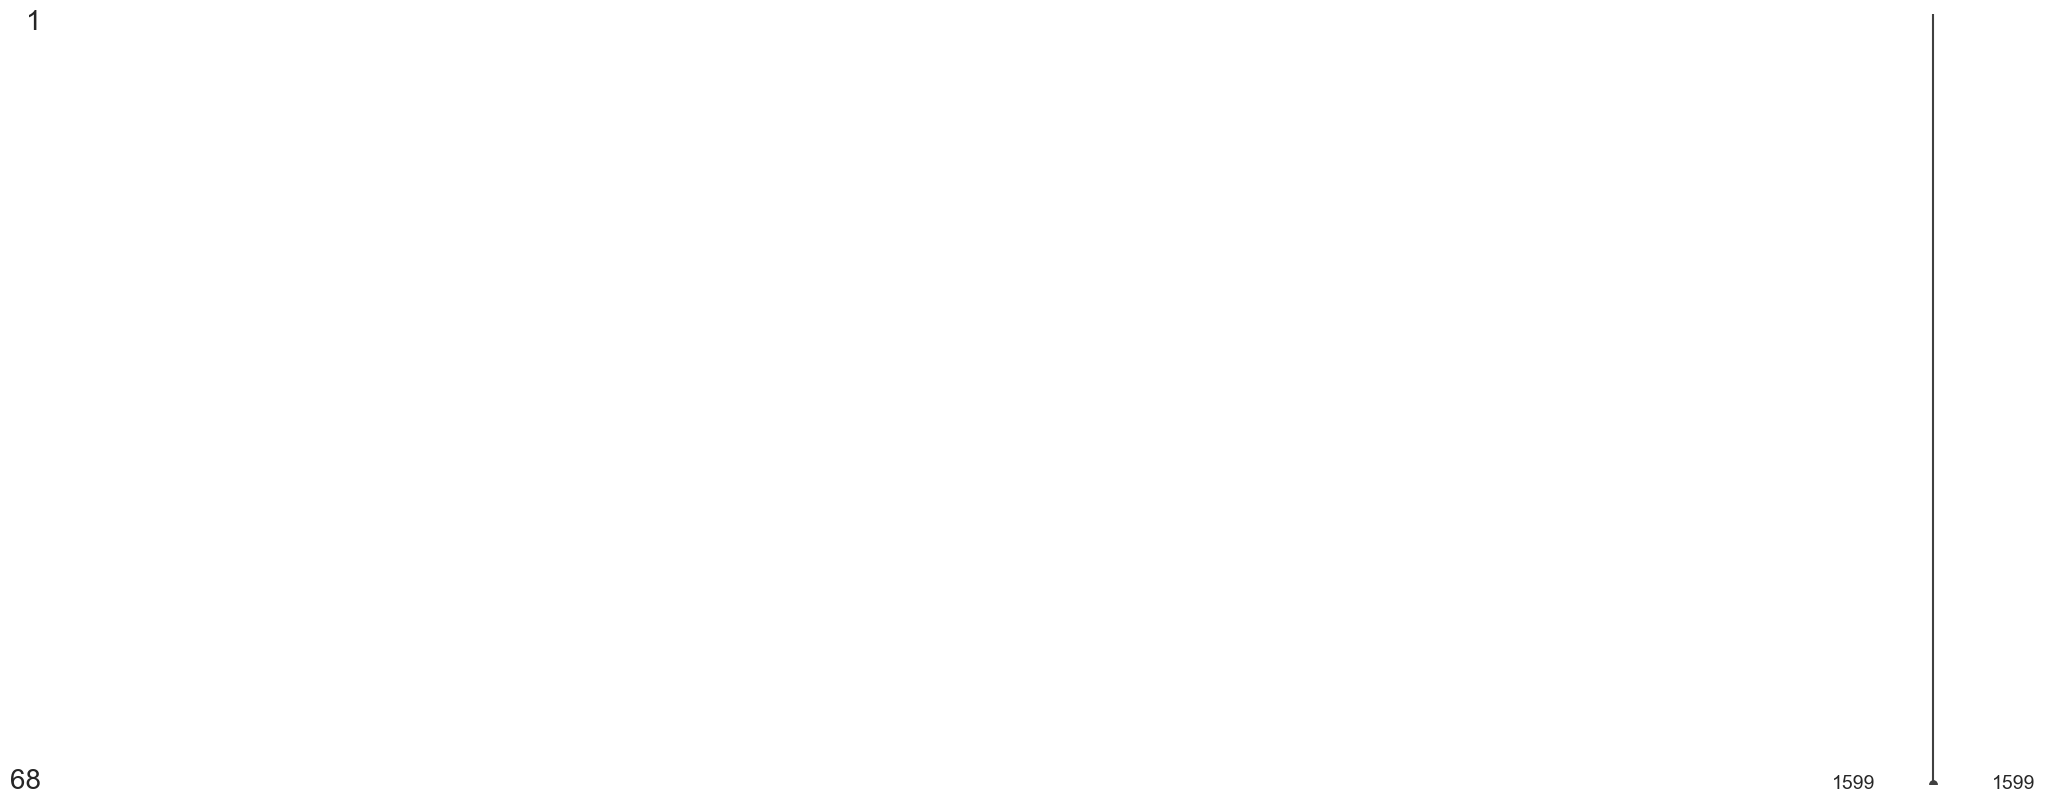

In [28]:
#explore missing values
matrix_fig = msno.matrix(df_radiomic)
plt.figure(1)
matrix_fig = matrix_fig.get_figure()

In [29]:
# Extraemos los datos (variable dependiente y variables independientes)
X = df_radiomic.drop('Result', axis=1)
y = df_radiomic.Result

y.value_counts()

Result
0    34
1    34
Name: count, dtype: int64

In [30]:
corr_df = df_radiomic.corr(method='pearson')
corr_df.head()

,IL6,Ferritin,PCR,LDH,CD4,CD8,DimerD,Viral_load_baseline,RNA_total_concentration,Glucose,...,GDS_6,Barthel_scale_1,Barthel_scale_2,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_3,Pulmonary_affectation_4
IL6,1.000000,0.171898,0.191126,0.176366,-0.135593,0.152154,0.013925,0.177394,0.054116,0.115098,...,0.479878,0.265531,0.001125,0.001363,0.062864,-0.168540,-0.072811,0.272265,-0.020442,-0.068213
Ferritin,0.171898,1.000000,0.447829,0.392207,-0.206805,-0.180682,0.246436,0.546184,-0.070369,0.223313,...,0.189027,-0.042942,0.126070,-0.053597,-0.037193,-0.088638,-0.046633,-0.114237,0.019605,0.145672
PCR,0.191126,0.447829,1.000000,0.559445,-0.024031,-0.013466,0.051068,0.577626,0.200824,0.302014,...,0.027166,-0.182747,0.103737,0.140340,-0.063196,-0.179496,-0.134625,0.098642,0.056839,-0.029620
LDH,0.176366,0.392207,0.559445,1.000000,-0.166940,-0.119195,0.380677,0.323598,0.174615,-0.028465,...,-0.154856,-0.101329,-0.033349,0.197158,-0.049646,-0.178868,-0.097715,-0.044597,0.126666,-0.034513
CD4,-0.135593,-0.206805,-0.024031,-0.166940,1.000000,0.382389,-0.146411,-0.032551,0.054973,-0.008860,...,-0.169785,-0.162812,-0.001004,-0.116222,0.158726,0.182547,-0.103999,-0.136067,0.133100,0.085555


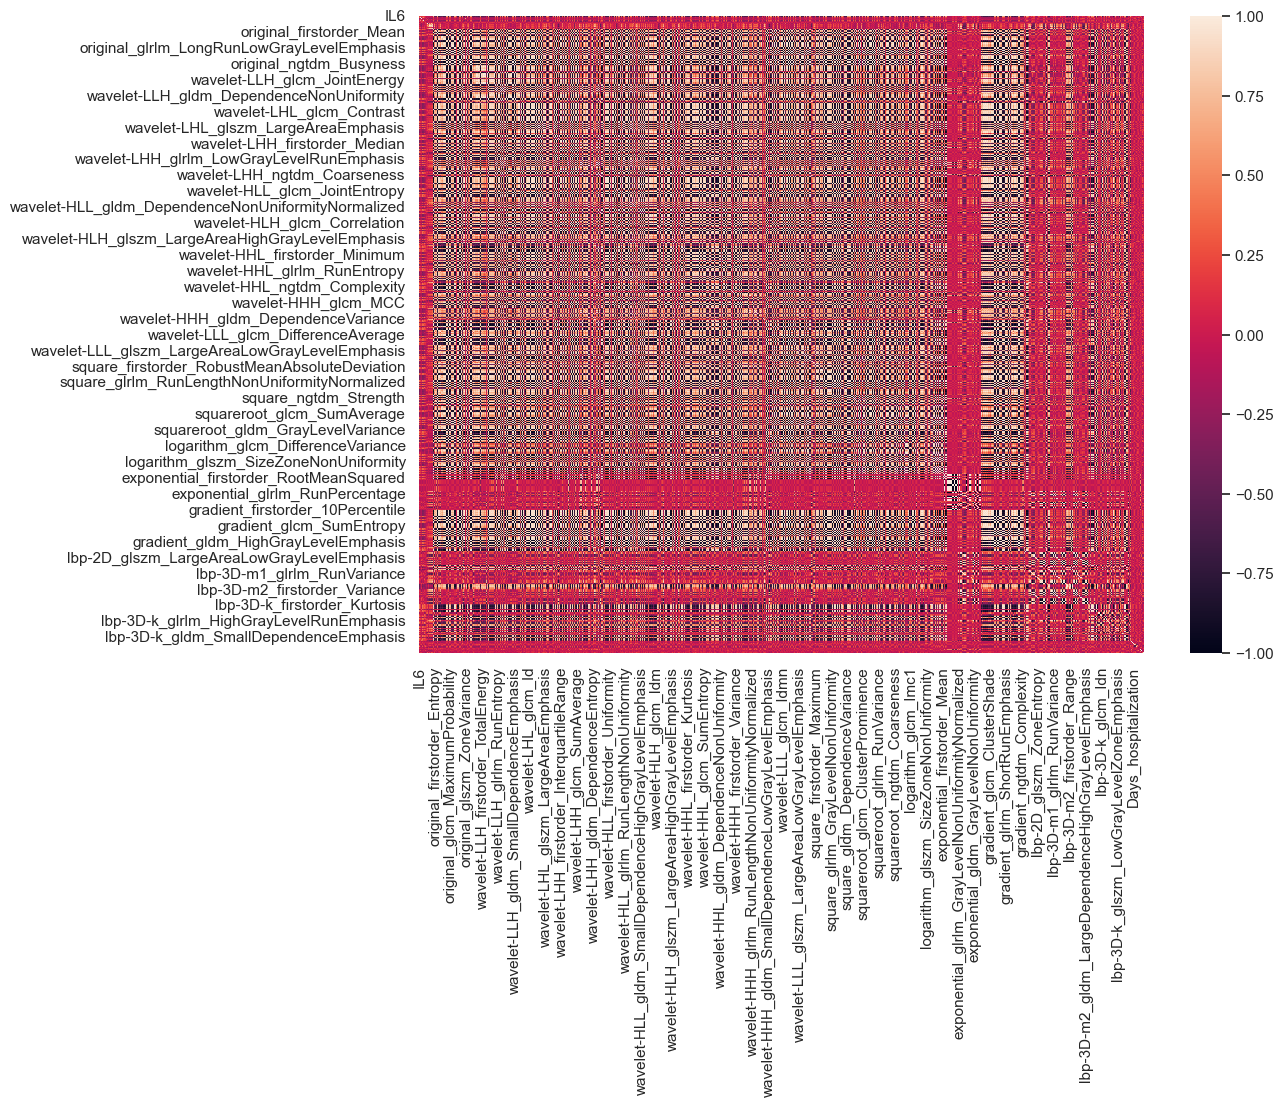

In [31]:
# correlation matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(2)

corr_fig = sns.heatmap(corr_df),
           # xticklabels=corr_df.columns.values,
           # yticklabels=corr_df.columns.values)
#fig = corr_fig.get_figure()
plt.show(block=False)

In [32]:
cols = df_radiomic.columns
print(cols)

Index(['IL6', 'Ferritin', 'PCR', 'LDH', 'CD4', 'CD8', 'DimerD',
       'Viral_load_baseline', 'RNA_total_concentration', 'Glucose',
       ...
       'GDS_6', 'Barthel_scale_1', 'Barthel_scale_2', 'Barthel_scale_3',
       'Barthel_scale_4', 'Barthel_scale_5', 'Pulmonary_affectation_1',
       'Pulmonary_affectation_2', 'Pulmonary_affectation_3',
       'Pulmonary_affectation_4'],
      dtype='object', length=1599)


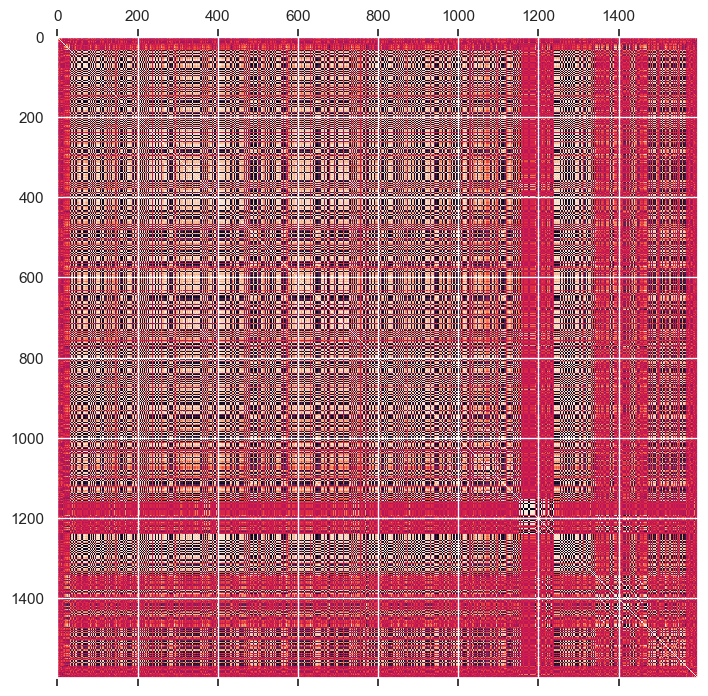

In [33]:
plt.matshow(corr_df)
plt.show()

In [34]:
# 1. Calcular la matriz de correlación
# 2. Identificar las variables altamente correlacionadas
highly_correlated_vars = set()
threshold = 0.75
target_variable = "Result"

for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > threshold:
            var1 = corr_df.columns[i]
            var2 = corr_df.columns[j]
            corr_with_target_var1 = abs(df_radiomic[var1].corr(df_radiomic[target_variable]))
            corr_with_target_var2 = abs(df_radiomic[var2].corr(df_radiomic[target_variable]))
            if corr_with_target_var1 < corr_with_target_var2:
                highly_correlated_vars.add(var1)
            else:
                highly_correlated_vars.add(var2)


# 3. Eliminar las variables altamente correlacionadas
df_radiomic.drop(columns=highly_correlated_vars, inplace=True)
X.drop(columns=highly_correlated_vars, inplace=True)

# 4. Actualizar la matriz de correlación si lo deseas
correlation_matrix_updated = df_radiomic.corr(method='pearson')

In [35]:
df_radiomic

,IL6,Ferritin,PCR,LDH,CD4,CD8,DimerD,Viral_load_baseline,RNA_total_concentration,Glucose,...,GDS_6,Barthel_scale_1,Barthel_scale_2,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_3,Pulmonary_affectation_4
0,0.000000,1011.000000,24.500000,547.000000,297.000000,49.000000,959,2.933074,408.500000,357,...,0,0,0,0,1,0,0,0,1,0
1,1.014747,1000.010754,24.263841,546.423439,294.001885,49.507373,975,2.879569,410.142045,351,...,0,0,0,1,0,0,0,0,0,1
2,2.000000,79.000000,5.870000,171.000000,120.000000,110.000000,1590,1.061269,383.400000,173,...,0,0,0,0,1,0,0,0,1,0
3,2.000000,394.600000,4.610000,237.000000,189.000000,87.000000,740,0.621495,351.200000,180,...,0,1,0,0,0,0,0,0,0,0
4,3.000000,263.000000,8.460000,316.000000,150.000000,349.000000,2010,1.997462,341.900000,198,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,190.000000,2163.000000,19.640000,800.000000,222.000000,121.000000,970,3.023945,431.900000,149,...,0,0,0,0,0,0,0,0,0,0
64,193.000000,533.000000,32.800000,226.000000,222.000000,260.000000,2260,2.363869,418.700000,94,...,0,0,0,1,0,0,0,1,0,0
65,269.000000,100.000000,11.980000,269.000000,485.000000,1523.000000,550,1.306566,418.800000,113,...,0,0,0,0,1,0,0,0,1,0
66,409.000000,2417.000000,10.080000,627.000000,108.000000,61.000000,2480,2.573836,415.800000,100,...,0,0,0,0,1,0,0,0,1,0


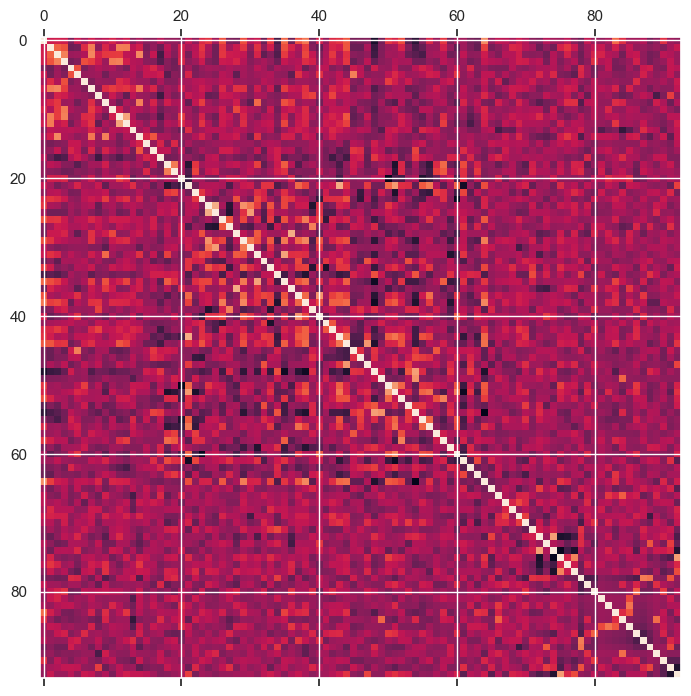

In [36]:
corr_df = df_radiomic.corr(method='pearson')
plt.matshow(corr_df)
plt.show()


In [37]:
def cal_vif(x, thresh=5):
    output = x.copy()
    while True:
        vif = [variance_inflation_factor(output.values, i) for i in range(output.shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            max_index = vif.index(max_vif)
            output = output.drop(output.columns[max_index], axis=1)
        else:
            break
    return output

selected_features = cal_vif(X)
print(selected_features.head())

# Obtener los nombres de las columnas seleccionadas
selected_features_columns = selected_features.columns

# Actualizar df_radiomic para que solo contenga las columnas seleccionadas y la columna 'Result'
df_radiomic_cleaned = df_radiomic[list(selected_features_columns) + ['Result']]

   wavelet-LHL_firstorder_Skewness  wavelet-LHH_glcm_ClusterShade  \
0                        -0.395261                       3.169467   
1                         0.109242                      -1.224936   
2                         0.481832                      -0.577174   
3                         0.021684                      -3.200316   
4                        -0.368591                       2.075660   

   wavelet-HLL_glcm_ClusterShade  wavelet-HLH_glcm_ClusterShade  \
0                     -26.002414                      -0.653126   
1                      -3.004299                       1.818533   
2                      -9.155795                       2.154857   
3                      -5.101127                       2.233429   
4                     -15.276616                       2.539326   

   wavelet-HHL_glcm_ClusterShade  wavelet-HHH_firstorder_Mean  \
0                       1.071322                    -0.000773   
1                       0.083183                    

In [38]:
df_radiomic_cleaned

,wavelet-LHL_firstorder_Skewness,wavelet-LHH_glcm_ClusterShade,wavelet-HLL_glcm_ClusterShade,wavelet-HLH_glcm_ClusterShade,wavelet-HHL_glcm_ClusterShade,wavelet-HHH_firstorder_Mean,wavelet-HHH_firstorder_Median,square_glcm_ClusterShade,logarithm_glszm_SmallAreaLowGrayLevelEmphasis,logarithm_ngtdm_Contrast,...,GDS_5,GDS_6,Barthel_scale_1,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_4,Result
0,-0.395261,3.169467,-26.002414,-0.653126,1.071322,-0.000773,-0.016172,-181.476982,8.452074e-03,0.029064,...,0,0,0,0,1,0,0,0,0,0
1,0.109242,-1.224936,-3.004299,1.818533,0.083183,0.031292,0.026798,-13.921647,4.463031e-03,0.063122,...,0,0,0,1,0,0,0,0,1,0
2,0.481832,-0.577174,-9.155795,2.154857,-0.094529,-0.021884,-0.023758,-111.993898,8.459237e-03,0.005832,...,0,0,0,0,1,0,0,0,0,1
3,0.021684,-3.200316,-5.101127,2.233429,-0.033290,0.024525,-0.012844,-140.720816,5.852301e-03,0.021242,...,0,0,1,0,0,0,0,0,0,1
4,-0.368591,2.075660,-15.276616,2.539326,0.078578,-0.029488,-0.012470,-147.943691,1.183720e-02,0.013273,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.105672,-0.043867,-0.094074,-0.049915,-0.035450,0.000026,0.000000,0.000000,9.799541e-11,0.000000,...,0,0,0,0,0,0,0,0,0,0
64,0.577604,-0.121353,-0.178416,-0.128227,-0.122029,-0.000021,0.000000,0.000000,2.165484e-11,0.000000,...,0,0,0,1,0,0,0,1,0,1
65,-0.082384,-0.039569,-0.069149,-0.042223,-0.034903,-0.000026,0.000000,0.000000,2.854938e-02,0.000000,...,0,0,0,0,1,0,0,0,0,1
66,0.052650,-0.040820,-0.068791,-0.044762,-0.040605,0.000059,0.000000,0.000000,5.884726e-06,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [39]:
dataset_description = df_radiomic_cleaned.describe()
dataset_description

,wavelet-LHL_firstorder_Skewness,wavelet-LHH_glcm_ClusterShade,wavelet-HLL_glcm_ClusterShade,wavelet-HLH_glcm_ClusterShade,wavelet-HHL_glcm_ClusterShade,wavelet-HHH_firstorder_Mean,wavelet-HHH_firstorder_Median,square_glcm_ClusterShade,logarithm_glszm_SmallAreaLowGrayLevelEmphasis,logarithm_ngtdm_Contrast,...,GDS_5,GDS_6,Barthel_scale_1,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_4,Result
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.001767,0.409404,-2.394808,1.355857,-0.006443,0.001903,-0.007795,-41.498248,4.900531e-03,0.056499,...,0.029412,0.044118,0.058824,0.220588,0.279412,0.132353,0.014706,0.132353,0.352941,0.500000
std,0.303441,1.496305,11.537414,1.714821,0.264631,0.015816,0.013026,77.628548,4.667434e-03,0.111506,...,0.170214,0.206883,0.237044,0.417726,0.452046,0.341394,0.121268,0.341394,0.481438,0.503718
min,-0.595448,-3.610918,-43.342980,-0.653126,-0.516260,-0.045639,-0.039694,-237.982818,3.701983e-12,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.199868,-0.217334,-9.291222,-0.046162,-0.159383,-0.002513,-0.019179,-92.326301,2.355885e-03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.029352,-0.041696,-0.364765,1.028508,-0.035177,0.000013,-0.004768,-42.894399,4.947017e-03,0.021751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.126288,1.048331,-0.068923,2.184760,0.079535,0.008125,0.000000,0.000000,6.397959e-03,0.060950,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.769626,5.214785,34.343552,9.414509,1.260075,0.045329,0.026798,270.390225,2.854938e-02,0.646839,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Inicializar el escalador estándar
scaler = MinMaxScaler()

# Seleccionar las columnas a estandarizar (todas menos 'Feature4')
columns_to_scale = df_radiomic_cleaned.drop(columns='Result')

# Aplicar la estandarización a las columnas seleccionadas
df_radiomic_cleaned[columns_to_scale.columns] = scaler.fit_transform(columns_to_scale)

In [41]:
df_radiomic_cleaned

,wavelet-LHL_firstorder_Skewness,wavelet-LHH_glcm_ClusterShade,wavelet-HLL_glcm_ClusterShade,wavelet-HLH_glcm_ClusterShade,wavelet-HHL_glcm_ClusterShade,wavelet-HHH_firstorder_Mean,wavelet-HHH_firstorder_Median,square_glcm_ClusterShade,logarithm_glszm_SmallAreaLowGrayLevelEmphasis,logarithm_ngtdm_Contrast,...,GDS_5,GDS_6,Barthel_scale_1,Barthel_scale_3,Barthel_scale_4,Barthel_scale_5,Pulmonary_affectation_1,Pulmonary_affectation_2,Pulmonary_affectation_4,Result
0,0.146649,0.768254,0.223212,0.000000,0.893740,0.493211,0.353760,0.111150,2.960510e-01,0.044932,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.516228,0.270345,0.519249,0.245505,0.337460,0.845695,1.000000,0.440742,1.563267e-01,0.097585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0.789173,0.343740,0.440066,0.278912,0.237417,0.261135,0.239675,0.247828,2.963019e-01,0.009016,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.452087,0.046523,0.492258,0.286716,0.271891,0.771309,0.403816,0.191320,2.049887e-01,0.032840,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.166187,0.644320,0.361277,0.317101,0.334868,0.177549,0.409436,0.177112,4.146219e-01,0.020520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.358791,0.404166,0.556710,0.059916,0.270675,0.501994,0.596976,0.468126,3.302818e-09,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
64,0.859332,0.395387,0.555625,0.052137,0.221935,0.501472,0.596976,0.468126,6.288351e-10,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
65,0.375851,0.404653,0.557031,0.060680,0.270983,0.501424,0.596976,0.468126,1.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
66,0.474771,0.404511,0.557036,0.060428,0.267773,0.502359,0.596976,0.468126,2.061243e-04,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [42]:
# 3. Reincluir la columna 'Notas' al final
df_final = pd.concat([df_radiomic_cleaned, id], axis=1)

TypeError: cannot concatenate object of type '<class 'builtin_function_or_method'>'; only Series and DataFrame objs are valid

In [43]:
df_radiomic_cleaned.to_excel('C:/Users/jor14/Desktop/all_augmented_M.xlsx', index=False)